In [1]:
import os
from os.path import join as pjoin
from matplotlib import pyplot as plt
from magicbox.io.io import CiftiReader
from cxy_visual_dev.lib.predefine import proj_dir

work_dir = pjoin(proj_dir, 'analysis/plot/plot_tmp')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# 画出HCPD, HCPYA, HCPA重叠年龄平均map的两两之间的散点图，观察能否找到两个数据集之间系统性误差的关系。

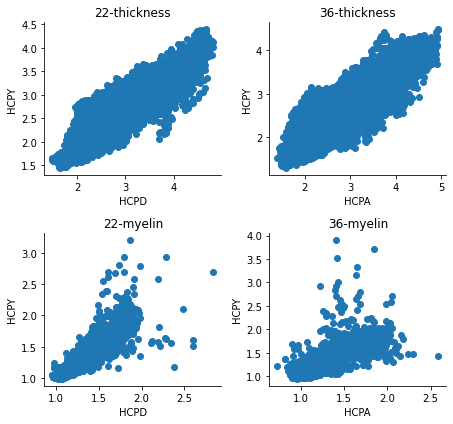

In [5]:
figsize = (6.4, 6)
meas_names = ('thickness', 'myelin')
meas_files = pjoin(proj_dir, 'analysis/structure/{0}_{1}_age-map-mean.dscalar.nii')
dataset_name_pairs = [('HCPD', 'HCPY'), ('HCPA', 'HCPY')]
trg_ages = ['22', '36']
_, axes = plt.subplots(len(meas_names), len(dataset_name_pairs), figsize=figsize)
for i, meas_name in enumerate(meas_names):
    for j, name_pair in enumerate(dataset_name_pairs):
        ax = axes[i, j]
        trg_age = trg_ages[j]
        meas_file1 = meas_files.format(name_pair[0], meas_name)
        meas_file2 = meas_files.format(name_pair[1], meas_name)
        reader1 = CiftiReader(meas_file1)
        reader2 = CiftiReader(meas_file2)
        idx1 = reader1.map_names().index(trg_age)
        idx2 = reader2.map_names().index(trg_age)
        map1 = reader1.get_data()[idx1]
        map2 = reader2.get_data()[idx2]
        ax.scatter(map1, map2)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(f'{name_pair[0]}')
        ax.set_ylabel(f'{name_pair[1]}')
        ax.set_title(f'{trg_age}-{meas_name}')
plt.tight_layout()
plt.savefig(pjoin(work_dir, 'scatter_between_dataset_overlapping-age.jpg'))
